# 测试yolo格式的标签是否与图像对应

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt



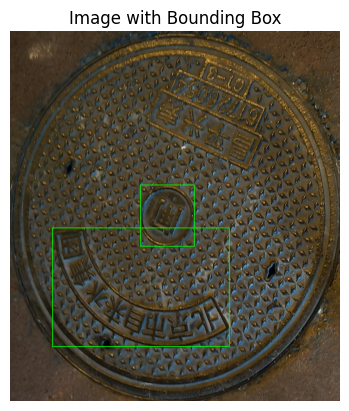

In [15]:

# # 定义文件夹路径
# images_folder = '../../images_dataset_yolo'

# # 获取所有的图片文件
# image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# 随机选择一张图片
# selected_image_file = random.choice(image_files)
selected_image_path = "../../images_dataset_yolo/images/val_augmentation/IMG_20240629_002502_target_0.jpg"

# 对应的txt文件
# selected_txt_file = selected_image_file.replace('.jpg', '.txt')
selected_txt_path =  "../../images_dataset_yolo/labels/val_augmentation/IMG_20240629_002502_target_0.txt"

# 读取图片
image = cv2.imread(selected_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 获取图片的宽度和高度
image_height, image_width = image.shape[:2]

# 读取txt文件中的标签信息
with open(selected_txt_path, 'r') as f:
    lines = f.readlines()

# 在图片上绘制矩形框
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.split())

    # 转换为像素坐标
    x_center = int(x_center * image_width)
    y_center = int(y_center * image_height)
    width = int(width * image_width)
    height = int(height * image_height)

    # 计算矩形框的左上角和右下角坐标
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # 绘制矩形框
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 使用Matplotlib显示图片
plt.imshow(image_rgb)
plt.title('Image with Bounding Box')
plt.axis('off')
plt.show()
